In [2]:
import json
from osgeo import gdal
import numpy as np
import random
from matplotlib import pyplot as plt

In [3]:
with open("data/dataset_filtered_water_train.json", "r") as f:
    testst = json.load(f)

indexes = random.sample(testst.keys(), 1000)

/var/folders/mm/pp6z4g_57wd5hg1w90myww1r0000gn/T/ipykernel_54305/89085244.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  indexes = random.sample(testst.keys(), 1000)


In [4]:
B02_min, B02_max = [], []
B03_min, B03_max = [], []
B04_min, B04_max = [], [] 
B05_min, B05_max = [], []
B06_min, B06_max = [], []
B07_min, B07_max = [], []
B08_min, B08_max = [], []

In [5]:
def value_ranges_repartition(pixel_array, range_size=1000, lower_percentile=5, upper_percentile=95):
    min_value, max_value = np.min(pixel_array), np.max(pixel_array)
    bins = np.arange(min_value, max_value + range_size, range_size)
    
    hist, _ = np.histogram(pixel_array, bins=bins)
    repartition = dict(zip(bins[:-1], hist))
    
    total_pixels = pixel_array.size
    percentages = {k: (v / total_pixels) * 100 for k, v in repartition.items()}
    
    lower_threshold = np.percentile(pixel_array, lower_percentile)
    upper_threshold = np.percentile(pixel_array, upper_percentile)
    
    # min_population_range = min(repartition, key=repartition.get)
    # max_population_range = max(repartition, key=repartition.get)
    
    # print("Histogram:")
    # for k, v in percentages.items():
    #     print(f"Range: {k}-{k + range_size - 1}, Percentage: {v:.2f}%")
    
    # print("5% threshold:", lower_threshold)
    # print("95% threshold:", upper_threshold)
    
    return lower_threshold, upper_threshold


In [35]:
for i in indexes:
    data = testst[str(i)]
    B02_l, B02_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B02"]).ReadAsArray())
    B02_min.append(B02_l)
    B02_max.append(B02_u)

    B03_l, B03_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B03"]).ReadAsArray())
    B03_min.append(B03_l)
    B03_max.append(B03_u)

    B04_l, B04_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B04"]).ReadAsArray())
    B04_min.append(B04_l)
    B04_max.append(B04_u)

    B05_l, B05_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B05"]).ReadAsArray())
    B05_min.append(B05_l)
    B05_max.append(B05_u)

    B06_l, B06_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B06"]).ReadAsArray())
    B06_min.append(B06_l)
    B06_max.append(B06_u)

    B07_l, B07_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B07"]).ReadAsArray())
    B07_min.append(B07_l)
    B07_max.append(B07_u)
    
    # B08_l, B08_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B08"]).ReadAsArray())
    # B08_min.append(B08_l)
    # B08_max.append(B08_u)



In [36]:
print("B02", np.mean(B02_min), np.mean(B02_max))
print("B03", np.mean(B03_min), np.mean(B03_max))
print("B04", np.mean(B04_min), np.mean(B04_max))
print("B05", np.mean(B05_min), np.mean(B05_max))
print("B06", np.mean(B06_min), np.mean(B06_max))
print("B07", np.mean(B07_min), np.mean(B07_max))

B02 307.18325 4587.731
B03 371.6875 4467.54025
B04 273.92325 4405.397
B05 509.129 4847.181
B06 988.129 5460.864
B07 1145.53 5712.73


In [75]:
B02 = gdal.Open(testst[str(1733)]["s2_cloudy_B02"]).ReadAsArray()
B03 = gdal.Open(testst[str(1733)]["s2_cloudy_B03"]).ReadAsArray()
B04 = gdal.Open(testst[str(1733)]["s2_cloudy_B04"]).ReadAsArray()

In [98]:
im = np.stack((B04, B03, B02), axis=-1)
clipped_B02 = np.clip(B02, 200, 4580)
clipped_B03 = np.clip(B03, 200, 4580)
clipped_B04 = np.clip(B04, 200, 4580)

In [99]:
cim = np.array(np.stack((clipped_B04, clipped_B03, clipped_B02), axis=-1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


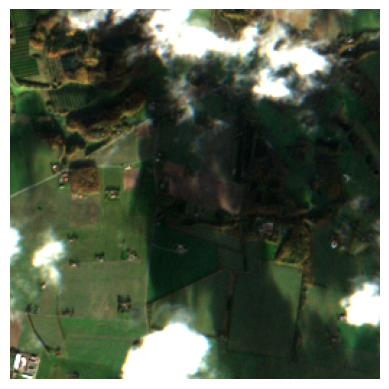

In [65]:
# im = gdal.Open("data/cropped/s2/S2_32VNH_20200103/S2_32VNH_20200103_B02/S2_32VNH_20200103_B02_137_520460_6289760_256.vrt").ReadAsArray()
# im = gdal.Open("data/cropped/s2/S2_32VNH_20210926/S2_32VNH_20210926_B02/S2_32VNH_20210926_B02_1195_587020_6228320_256.vrt").ReadAsArray()
B02 = gdal.Open("data/cropped/s2/S2_32VNH_20211105/S2_32VNH_20211105_B02/S2_32VNH_20211105_B02_1267_551180_6223200_256.vrt").ReadAsArray()
B03 = gdal.Open("data/cropped/s2/S2_32VNH_20211105/S2_32VNH_20211105_B03/S2_32VNH_20211105_B03_1267_551180_6223200_256.vrt").ReadAsArray()
B04 = gdal.Open("data/cropped/s2/S2_32VNH_20211105/S2_32VNH_20211105_B04/S2_32VNH_20211105_B04_1267_551180_6223200_256.vrt").ReadAsArray()
n = "B11"
im = gdal.Open(f"data/cropped/s1/S1_32VNH_202110").ReadAsArray()
# im = np.stack((B04, B03, B02), axis=-1)/2000
plt.imshow(im)
plt.axis('off')
plt.savefig(n+".png", bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


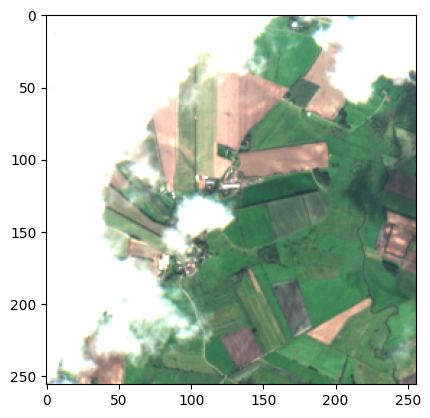

In [8]:
path = "S2_32VNH_20191005_B02_222_517900_6284640_256"
date = "_".join(path.split("_")[:3])
rest = "_".join(path.split("_")[4:])

CLIP_MIN_S2, CLIP_MAX_S2 = 100, 5800

band2 = gdal.Open(f"data/cropped/s2/{date}/{date}_B02/{date}_B02_{rest}.vrt").ReadAsArray()
band2 = np.clip(band2, CLIP_MIN_S2, CLIP_MAX_S2)
band3 = gdal.Open(f"data/cropped/s2/{date}/{date}_B03/{date}_B03_{rest}.vrt").ReadAsArray()
band3 = np.clip(band3, CLIP_MIN_S2, CLIP_MAX_S2)
band4 = gdal.Open(f"data/cropped/s2/{date}/{date}_B04/{date}_B04_{rest}.vrt").ReadAsArray()
band4 = np.clip(band4, CLIP_MIN_S2, CLIP_MAX_S2)
im = np.stack((band4, band3, band2), axis=-1)/2000

plt.imshow(im)


In [12]:
from keras.models import load_model
